            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

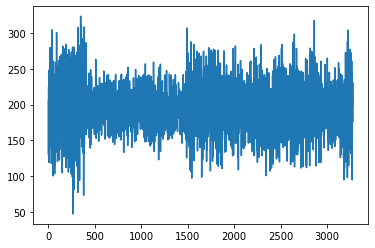

333.7757766108135
            ph    Hardness        Solids  Chloramines     Sulfate  \
1     3.716080  129.422921  18630.057858     6.635246  333.775777   
23    3.902476  196.903247  21167.500099     6.996312  333.775777   
36    3.641630  183.908722  24752.072460     5.538314  286.059556   
60    3.906078  233.402835  32144.799934     6.994840  348.359448   
76    3.514546  158.732076  23029.663614     6.821679  286.522847   
77    3.722500  163.639747  37962.167991     6.684570  326.694018   
104   2.612036  188.804126  34798.252587     6.796439  333.775777   
234   3.664711  201.097316  28102.756625     5.682035  330.023531   
285   3.882631  243.807950   7751.809491     0.530351  333.775777   
546   3.410360  207.397473  49074.730407     5.667433  301.975011   
681   3.623166  156.898917  26738.525361     5.023143  388.752253   
685   3.994498  179.454192  18682.277139     6.464793  331.145621   
712   3.681076  144.265270  26726.771113     6.095283  333.775777   
721   3.633163  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


2784
492
[]
0.6260162601626016
0.5813008130081301
               precision    recall  f1-score   support

    Drinkable       0.00      0.00      0.00         0
Non-Drinkable       1.00      0.63      0.77       492

     accuracy                           0.63       492
    macro avg       0.50      0.31      0.39       492
 weighted avg       1.00      0.63      0.77       492

               precision    recall  f1-score   support

    Drinkable       0.32      0.42      0.36       140
Non-Drinkable       0.74      0.64      0.69       352

     accuracy                           0.58       492
    macro avg       0.53      0.53      0.53       492
 weighted avg       0.62      0.58      0.60       492

[[  0   0]
 [184 308]]
[[ 59  81]
 [125 227]]
2017        Drinkable
2533    Non-Drinkable
589     Non-Drinkable
482     Non-Drinkable
2620    Non-Drinkable
            ...      
2476    Non-Drinkable
2674    Non-Drinkable
3254        Drinkable
422     Non-Drinkable
2534    Non-Drinka

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [2]:
import pandas as pd

# a) Create a dataframe from the dataset
df = pd.read_csv('/water_potability.csv')

# b) Display all the features and display the target column also.
print(df)

print(df.columns)

# c) Count the total records in the data set.
print(df.size)

# d) Display the type of each column
print(df.dtypes)

# e) Plot the hardness feature of the dataset
import matplotlib.pyplot as plt
import numpy as np

df['Hardness'].plot()
plt.show()

# f) Find the mean sulphate present in different water samples collected.
mean = df['Sulfate'].mean()
print(mean)

# g) Fill the features having NULL with the mean value.
df.fillna(df.mean(), inplace=True)

# h) Display the water samples where the ph is < 4 and chloramines is < 7
out = df.loc[(df['ph'] < 4) & (df['Chloramines'] < 7)]
print(out)

# i) Mask the above objects having ph feature value &lt; 4 with its
out2 = ((df['ph'] < 4) & (df['Chloramines'] < 7))
df['ph'][out2] = 4
print(df[(df['ph'] == 4)])

# j) Convert the target column values as Drinkable where value is 1 and non-
#    drinkable where value is 0.

#df['Potability'].replace({0:'Non_Drinkable', 1:'Drinkable'})
#print(df)
df['Potability']=df['Potability'].map({1:'Drinkable',0:'Non-Drinkable'})
print(df)

# k)Prepare 85% of the dataset as train selected randomly and remaining as test
#   dataset.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
df = df.reset_index()
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15,random_state=0)
print(len(X_train))
print(len(X_test))
empty_cols = [col for col in df if df[col].isnull().all()]
print(empty_cols)

# l) Build the classification model using both KNN and SVM.
svc_model = SVC()

svc_model.fit(X_train, y_train)

svc_prediction = svc_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

# m) Test the performance of both the models display the accuracy and print the
# classification report.

knn_prediction = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(svc_prediction, y_test))

print(accuracy_score(knn_prediction, y_test))

from sklearn.metrics import classification_report

print(classification_report(svc_prediction, y_test))
print(classification_report(knn_prediction, y_test))

from sklearn.utils.multiclass import check_classification_targets
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(confusion_matrix(svc_prediction, y_test))
print(confusion_matrix(knn_prediction, y_test))
print(y_test)
cnt=0
for i in y_test:
  if i=='Drinkable':
    cnt+=1
print(cnt)

ct=0
for i in y_test:
  if i=='Non-Drinkable':
    ct+=1
print(ct)